In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yahoo_fin import stock_info as si

# 종목 코드 설정
tickers = {
    '삼성전자': '005930.KS',
    '네이버': '035420.KS',
    '카카오': '035720.KS'
}

# 데이터 수집
data = {}
for company, ticker in tickers.items():
    data[company] = si.get_data(ticker, start_date='2022-01-01', end_date='2025-01-01')

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [2]:
# 종가 데이터 추출 및 결합
close_prices = pd.DataFrame()

for company, df in data.items():
    close_prices[company] = df['close']

# 날짜 인덱스 설정
close_prices.index = data['삼성전자'].index

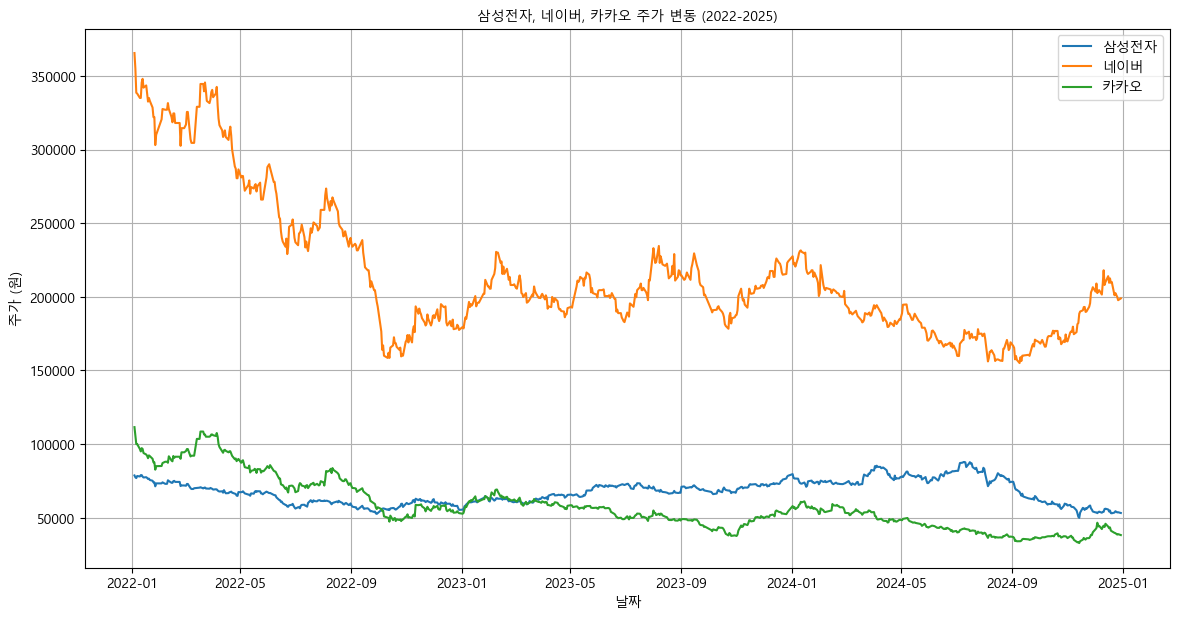

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 경로 설정 (Windows)
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로

font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(14, 7))
for company in close_prices.columns:
    plt.plot(close_prices.index, close_prices[company], label=company)

plt.title('삼성전자, 네이버, 카카오 주가 변동 (2022-2025)', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('주가 (원)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

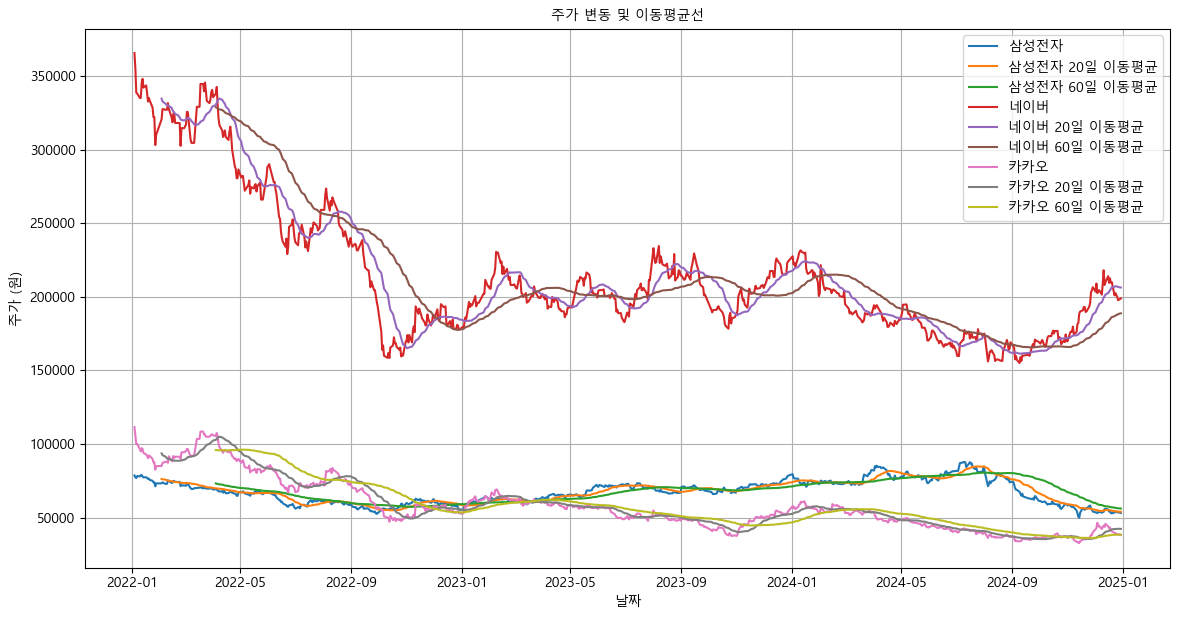

In [4]:
# 이동 평균선 계산
ma_days = [20, 60]
for ma in ma_days:
    for company in close_prices.columns:
        column_name = f'{company} {ma}일 이동평균'
        close_prices[column_name] = close_prices[company].rolling(window=ma).mean()

# 시각화
plt.figure(figsize=(14, 7))
for company in close_prices.columns[:3]:
    plt.plot(close_prices.index, close_prices[company], label=company)
    for ma in ma_days:
        plt.plot(close_prices.index, close_prices[f'{company} {ma}일 이동평균'],
                 label=f'{company} {ma}일 이동평균')

plt.title('주가 변동 및 이동평균선', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('주가 (원)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

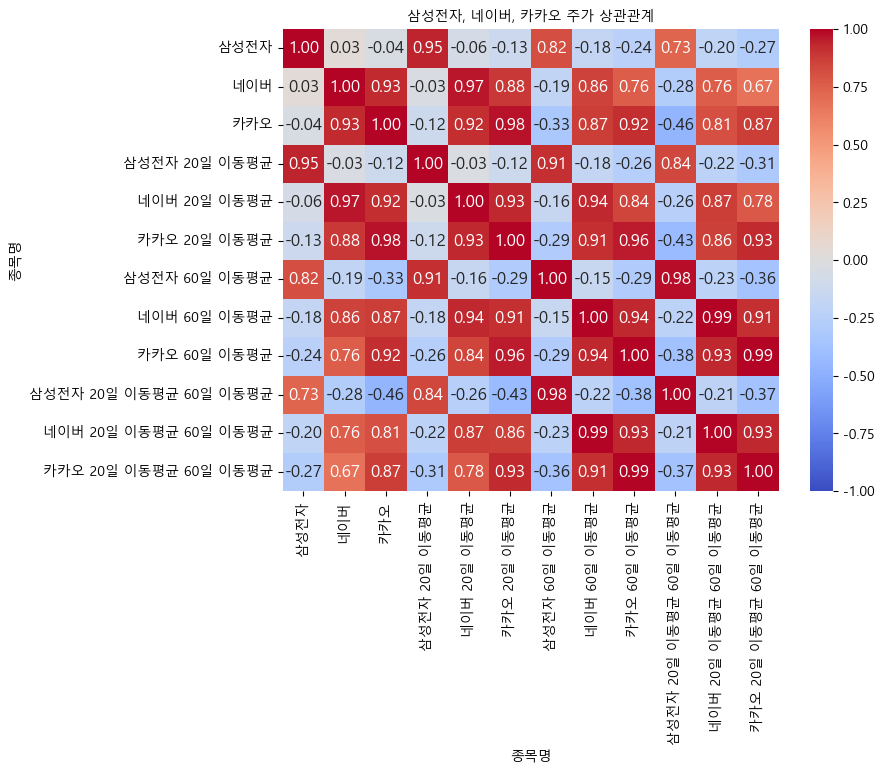

In [5]:
# 📌 종가 데이터의 상관계수 계산
corr = close_prices.corr()

# 📌 히트맵 시각화 (한글 폰트 적용)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"fontsize": 12, "fontproperties": font_prop}, fmt=".2f")

# 📌 그래프 제목 및 축 레이블 한글 적용
plt.title("삼성전자, 네이버, 카카오 주가 상관관계", fontproperties=font_prop)
plt.xlabel("종목명", fontproperties=font_prop)
plt.ylabel("종목명", fontproperties=font_prop)

plt.show()